#  Q2.  Implement the Lloyd's algorithm for kmeans

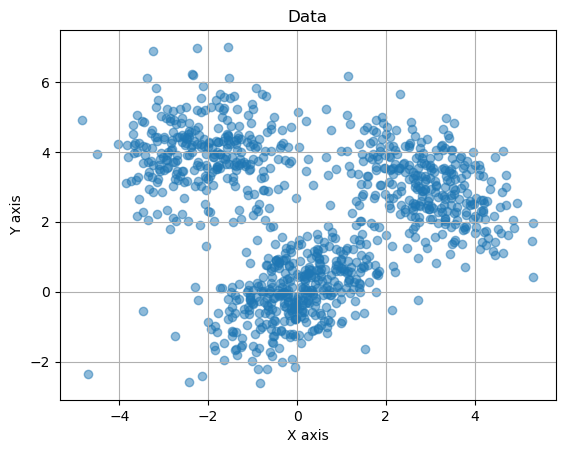

In [1]:
# First generate and visualize the input data


import numpy as np
import matplotlib.pyplot as plt

# Parameters for the mixture components
means = [np.array([0, 0]), np.array([3, 3]), np.array([-2, 4])]
covs = [np.array([[1, 0.5], [0.5, 1]]), np.array([[1, -0.5], [-0.5, 1]]), np.array([[1, 0], [0, 1]])]
weights = [0.4, 0.3, 0.3]  # Must sum to 1
num_samples = 1000

# Generate samples
samples = []
for mean, cov, weight in zip(means, covs, weights):
    num_component_samples = int(weight * num_samples)
    component_samples = np.random.multivariate_normal(mean, cov, num_component_samples)
    samples.append(component_samples)

# Combine samples from all components
data = np.vstack(samples)

# Plot
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title('Data')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(True)
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
def initialize_centroids(data, k):
    # Randomly select k data points from the dataset as centroids
    # ==================YOUR CODE HERE =================
    
    indices = np.random.choice(data.shape[0], k, replace=False)
    
    return data[indices]

def assign_clusters(data, centroids):
    # Return a vector of integers in {0,1,2,3,...,k-1} to indicate the cluster assignments of data points
    # the vector should be of length as long as the data size
    
    # ==================YOUR CODE HERE =================
    cluster_distances = [math.inf]*len(data)
    clusters = [-1]*len(data)
    for point in range(len(data)):
        distances = []
        for centroid in centroids:
            distances.append(np.linalg.norm(data[point]-centroid))
        for i in range(len(distances)):
            if cluster_distances[point] > distances[i]:
                cluster_distances[point] = distances[i]
                clusters[point] = i
    # ==================================================
    return clusters

def update_centroids(data, clusters, k):
    # update the centroids 
    # ==================YOUR CODE HERE =================
    running_sums = np.zeros([k,len(data[0])])
    num_items = [0]*k
    for i in range(len(data)):
        cluster = clusters[i]
        running_sums[cluster] += data[i]
        num_items[cluster] += 1
    new_centroids = []
    for i in range(k):
        for j in range(len(data[0])):
            new_centroids.append(running_sums[i][j]/num_items[i])
    new_centroids=np.array(new_centroids)
    new_centroids=new_centroids.reshape((k,len(data[0])))
    # ==================================================    
    return new_centroids

def kmeans(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)
    # Write a for loop to implement the kmeans algorithm
    for _ in range(max_iters):
        # ==================YOUR CODE HERE =================
        clusters = assign_clusters(data,centroids)
        centroids = update_centroids(data,clusters,k)
        # ==================================================
    # return the updated cluster centers
    return centroids, clusters




Centroids: [[ 2.90886818  2.98297092]
 [-0.05051513 -0.04345858]
 [-2.05193156  4.00030469]]


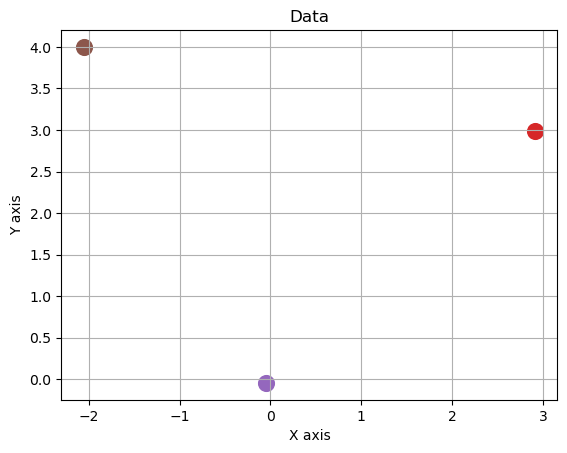

In [3]:
# If your implementation is valid, then the following should generate the clustering in colors.

k=3
centroids, clusters = kmeans(data,k)
print("Centroids:", centroids)
# Plot
colors =  plt.get_cmap("tab10")

for i in range(k):
    plt.scatter(data[clusters==i, 0], data[clusters==i, 1], color=colors(i), alpha=0.5)
for i in range(k):
    plt.scatter(centroids[i,0],centroids[i,1],marker='o',s=128,color=colors(i+k))
plt.title('Data')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(True)
plt.show()


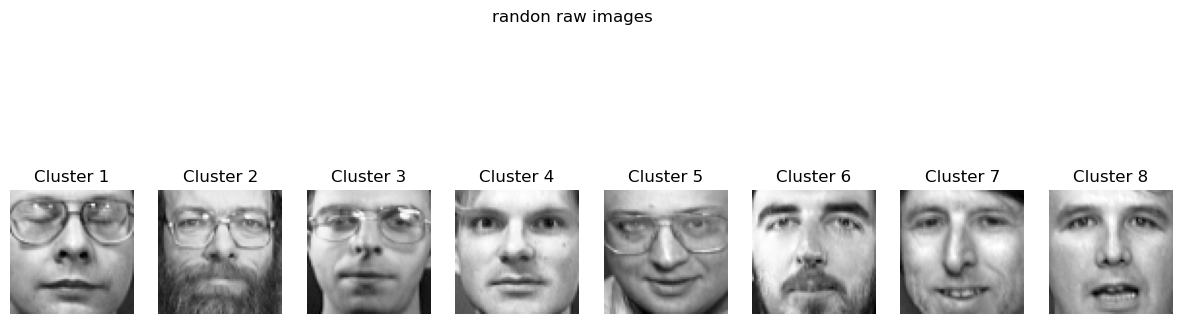

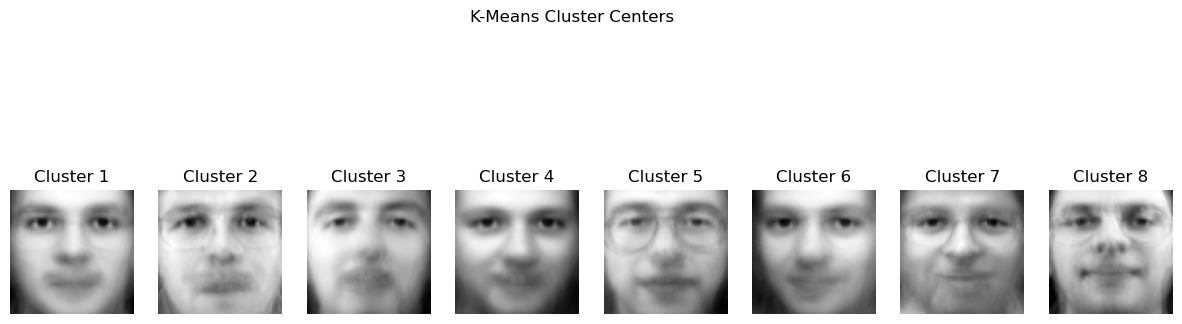

In [4]:
from sklearn.datasets import fetch_olivetti_faces

# We'll fetch the Olivetti faces dataset 
data = fetch_olivetti_faces().data

k = 8  # number of clusters

random_imgs = initialize_centroids(data, k)

# Visualize the cluster centers as images
plt.figure(figsize=(15, 5))
for i, centroid in enumerate(random_imgs ):
    plt.subplot(1, k, i + 1)
    plt.imshow(centroid.reshape(64, 64), cmap='gray')
    plt.title(f'Cluster {i+1}')
    plt.axis('off')
plt.suptitle('randon raw images')
plt.show()




# Apply K-Means Clustering
centroids, _ = kmeans(data, k)

# Visualize the cluster centers as images
plt.figure(figsize=(15, 5))
for i, centroid in enumerate(centroids):
    plt.subplot(1, k, i + 1)
    plt.imshow(centroid.reshape(64, 64), cmap='gray')
    plt.title(f'Cluster {i+1}')
    plt.axis('off')
plt.suptitle('K-Means Cluster Centers')
plt.show()

